In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cap = cv2.VideoCapture(0)

while (True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('frame', gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

plt.imshow(frame)

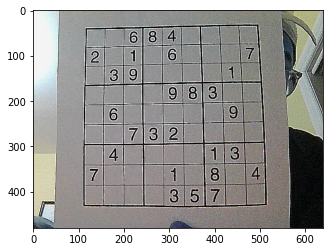

In [48]:
#sharpen image
cap = cv2.imread('capture.png')
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(cap, -1, kernel)

plt.imshow(im)

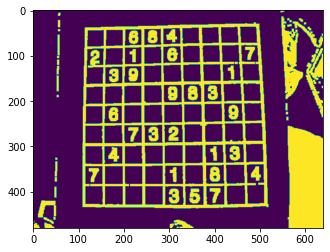

In [43]:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

ret,thresh1 = cv2.threshold(gray,40,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(thresh1,kernel,iterations = 1)
plt.imshow(dilation)

sdfsd
159923.0


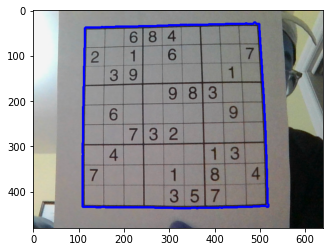

In [44]:
cap = cv2.imread('capture.png')
conts, h = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
index = 0
for c in reversed(conts):
    
    area = cv2.contourArea(c)
    if index == 10:
        break
    index+= 1
    if area > 100000:
        print('sdfsd')
        draw = cv2.drawContours(cap, [c], -1, (0,0,255), 3)
        rect = cv2.boundingRect(c)
        print(area)
        plt.imshow(draw)
        plt.show()
        break
        

109 27 411 410


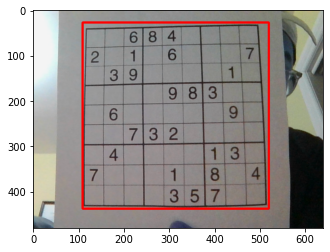

In [45]:
x = rect[0]
y = rect[1]
w = rect[2]
h = rect[3]
cap = cv2.imread('capture.png')
print(x, y, w, h)
image = cv2.rectangle(cap, (x,y), (x+w,y+h), (255, 0, 0), 3)

plt.imshow(image)

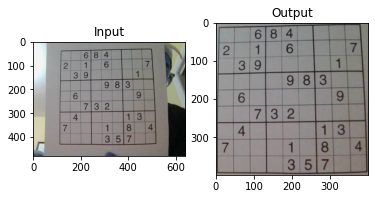

In [46]:
image = cv2.imread('capture.png')
pts1 = np.float32([[x,y],[x+w,y],[x,y+h],[x+w,y+h]])
pts2 = np.float32([[0,0],[400,0],[0,400],[400,400]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(image,M,(400,400))

plt.subplot(121),plt.imshow(image),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [47]:
cv2.imwrite('capture_grid.png', dst)

True